In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as nm
import seaborn as sn

In [2]:
path = "/kaggle/input/apple-quality/apple_quality.csv"

In [3]:
data = pd.read_csv(path)

In [4]:
data.head(3)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad


In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [8]:
data['Quality'] = le.fit_transform(data['Quality'])

In [9]:
for col in data.columns:
    if data[col].dtype != 'object':
        # For numeric columns, fill missing values with the mean
        data[col].fillna(data[col].mean(), inplace=True)

In [10]:
data.head(3)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0


In [11]:
data.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [12]:
data['Quality'].value_counts()

Quality
1    2004
0    1996
2       1
Name: count, dtype: int64

In [13]:
data.drop(data[data['Quality'] == 2].index, inplace=True)

Text(0.5, 1.0, 'Count of Each Quality Category')

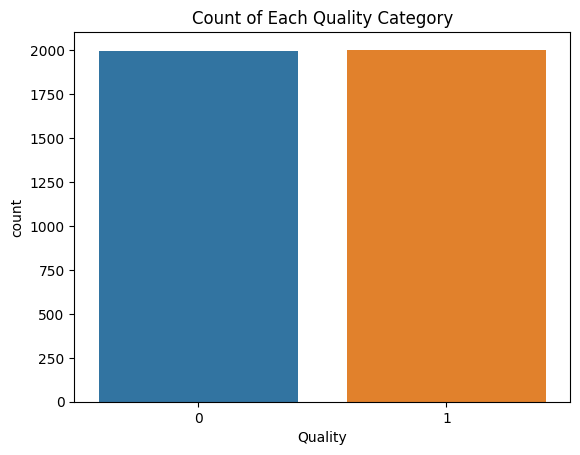

In [14]:
sn.countplot(x='Quality', data=data)
plt.title('Count of Each Quality Category')

In [15]:
x = data.drop(['A_id' , 'Quality'] , axis = 1)
y = data['Quality']

In [16]:
x.shape

(4000, 7)

In [17]:
y.shape

(4000,)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y , random_state = 41 , test_size = .30)

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [21]:
dt.fit(xtrain , ytrain)

DecisionTreeClassifier()

In [22]:
dt.score(xtrain ,ytrain)

1.0

In [23]:
dt.score(xtest,ytest)

0.7983333333333333

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(classification_report(ytest , dt.predict(xtest)))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       604
           1       0.79      0.81      0.80       596

    accuracy                           0.80      1200
   macro avg       0.80      0.80      0.80      1200
weighted avg       0.80      0.80      0.80      1200



In [26]:
cm = confusion_matrix(ytest , dt.predict(xtest))
cm

array([[474, 130],
       [112, 484]])

<Axes: >

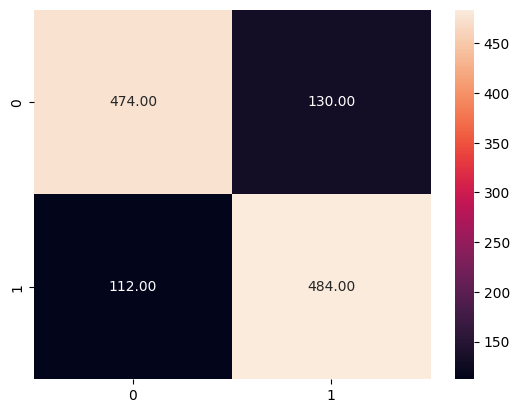

In [27]:
sn.heatmap(cm , annot =True ,fmt = '.2f')

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [29]:
rfc.fit(xtrain , ytrain)

RandomForestClassifier()

In [30]:
rfc.score(xtrain , ytrain)

1.0

In [31]:
rfc.score(xtest , ytest)

0.8725

In [32]:
print(classification_report(ytest , rfc.predict(xtest)))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       604
           1       0.86      0.89      0.87       596

    accuracy                           0.87      1200
   macro avg       0.87      0.87      0.87      1200
weighted avg       0.87      0.87      0.87      1200



In [33]:
cm = confusion_matrix(ytest , rfc.predict(xtest))
cm

array([[519,  85],
       [ 68, 528]])

<Axes: >

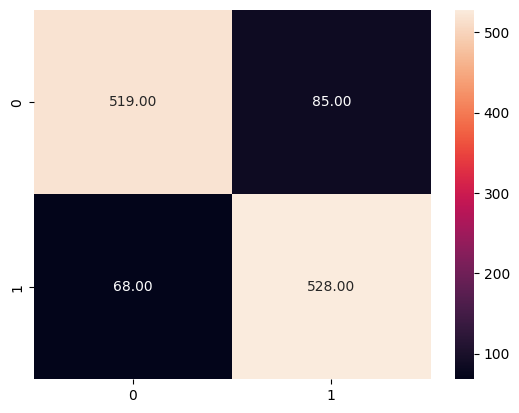

In [34]:
sn.heatmap(cm , annot =True ,fmt = '.2f')